In [2]:
import pandas as pd

# Create a small dataset for water quality
data = {
    "pH": [6.5, 7.2, 5.8, 8.1, 7.0, 6.8],
    "turbidity": [2.5, 1.0, 3.8, 0.5, 2.0, 3.2],
    "dissolved_oxygen": [7.0, 8.2, 5.5, 9.0, 7.5, 6.0],
    "nitrate": [12, 5, 20, 3, 15, 18],
    "temperature": [25, 22, 28, 20, 24, 27],
    "Quality": ["Good", "Good", "Bad", "Good", "Good", "Bad"]
}

df = pd.DataFrame(data)
df.to_csv("dataset.csv", index=False)  # save CSV in Colab environment

print("✅ Dataset created and saved as dataset.csv")
print(df)

✅ Dataset created and saved as dataset.csv
    pH  turbidity  dissolved_oxygen  nitrate  temperature Quality
0  6.5        2.5               7.0       12           25    Good
1  7.2        1.0               8.2        5           22    Good
2  5.8        3.8               5.5       20           28     Bad
3  8.1        0.5               9.0        3           20    Good
4  7.0        2.0               7.5       15           24    Good
5  6.8        3.2               6.0       18           27     Bad



Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]

Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(



Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[2]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


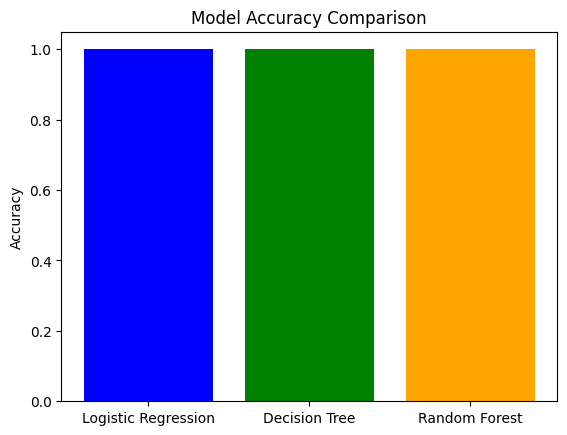

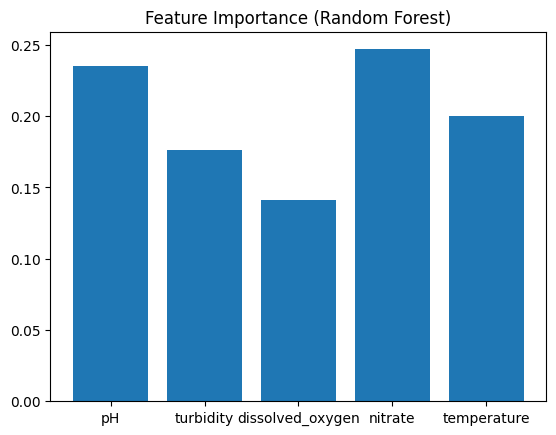

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


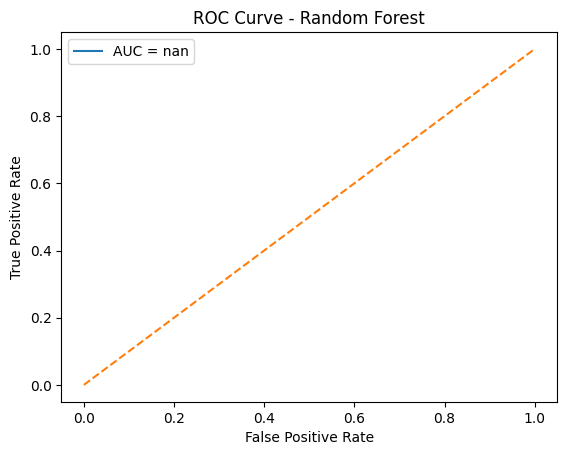

In [3]:
# ---------------------------
# Week 2: Advanced Project
# ---------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# ---------------------------
# Load Dataset
# ---------------------------
df = pd.read_csv("dataset.csv")
df = df.drop_duplicates()

# Encode label
df['Quality_label'] = df['Quality'].map({'Good': 1, 'Bad': 0})

# Features & Target
X = df[['pH','turbidity','dissolved_oxygen','nitrate','temperature']]
y = df['Quality_label']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---------------------------
# Models
# ---------------------------
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---------------------------
# Compare Accuracies
# ---------------------------
plt.bar(results.keys(), results.values(), color=['blue','green','orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# ---------------------------
# Feature Importance (Random Forest)
# ---------------------------
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
plt.bar(X.columns, importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

# ---------------------------
# ROC Curve (Random Forest)
# ---------------------------
y_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()